# A Statistical Analysis on the Relative Competitiveness of Bug Pokemon

In [2]:
## Libraries to be used in statistical analysis
library(tidyverse)
library(infer)
library(repr)
library(RColorBrewer)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Introduction

Pokemon is one of the most renowned and influential media franchises, spanning across electronic gaming, animated series, and film. In recent years, the impact of Pokemon has evolved from being primarily Japanese to a global sensation (Tobin, 2004). According to Mäyrä (2017), Pokemon has transformed the landscape of digital gaming, moving it from the fringes of public life to a central and significant role in mainstream culture. This evolution marks not only a shift in gaming habits, but also an expansion of digital gaming culture, with Pokemon now a game that has spread across the world and has had a profound impact.
 
Our objective is to determine whether there exists a significant disparity of total power between Bug-type and non-Bug Pokemon. This study utilises the Pokemon dataset, encompassing data on 721 Pokemon with various stats and types. Our focus lies in comparing the mean total power of Bug-type and non-Bug Pokemon and determining whether there is a differential between these two. There are two main parts in the project: the inferential and hypothesis.
 
In our inference analysis, our objective is to contrast the total power between Bug-type Pokemon and non-Bug Pokemon, which reveals the strength of Pokemon through data comparison. Through the plots and point estimates we took, there are initial conclusions regarding the disparity in total power. However, to fortify the reliability of this project, it is necessary to proceed with a hypothesis analysis.
 
In the subsequent phase, we delve into a hypothesis analysis concerning the mean total power disparity between Bug-type and non-Bug Pokemon. This analysis hinges on two core hypotheses: the null hypothesis and the alternative hypothesis. Our focus is to calcualte the p-value by test stastisc and compare the  p-value with the predetermined significance level, leading us to derive the necessary conclusion.

## Wrangling Data

In [3]:
## Reading and tidying data from file ##
pokemon <- read_csv("https://raw.githubusercontent.com/Kooriryuu/Stat201Group2/main/Pokemon.csv")
colnames(pokemon) <- gsub(" ", "_", colnames(pokemon))

## Wrangling Data (Removing legendaries and selecting relevant columns) ##
pokemon <- pokemon |>
    filter(!Legendary) |>
    select(Type_1, Type_2, Total) |>
    mutate(isBug = Type_1 == "Bug" | Type_2 == "Bug" & (!is.na(Type_2)))
head(pokemon)

Rows: 800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Type_1,Type_2,Total,isBug
<chr>,<chr>,<dbl>,<lgl>
Grass,Poison,318,FALSE
Grass,Poison,405,FALSE
Grass,Poison,525,FALSE
Grass,Poison,625,FALSE
Fire,NA,309,FALSE
Fire,NA,405,FALSE


The dataset used in this report was obtained from Kaggle which gave this dataset an 8.8/10 regarding its usability, completeness, credibility and compatibility of the dataset.\
We have filtered out legendary Pokémon, which could otherwise skew the results. Further, we selected only the columns relavent to focus on answering our question “Are Bug Pokemon weaker in power than non-Bug Pokemon?”.\
(61)

In [4]:
## Creating a sample (size = 30) of Bug and non-Bug Pokemon and calculating their sample means ##
set.seed(6969)
bug_sample <- pokemon |>
    filter(Type_1 == "Bug" | Type_2 == "Bug") |>
    sample_n(size = 30)

non_bug_sample <- pokemon |>
    filter(Type_1 != "Bug" & Type_2 != "Bug") |>
    sample_n(size = 30)

sample_means = tibble(
    bug_power = mean(bug_sample$Total),
    non_bug_power = mean(non_bug_sample$Total))
sample_means

## Creating a combined dataset of the two samples
combined_sample = rbind(bug_sample,non_bug_sample) |>
    mutate(isBug = Type_1 == "Bug" | Type_2 == "Bug" & (!is.na(Type_2)))
head(combined_sample)

bug_power,non_bug_power
<dbl>,<dbl>
376.3667,476.8667


Type_1,Type_2,Total,isBug
<chr>,<chr>,<dbl>,<lgl>
Bug,Fighting,600,TRUE
Bug,NA,195,TRUE
Bug,Poison,395,TRUE
Bug,NA,194,TRUE
Bug,Poison,390,TRUE
Bug,Steel,484,TRUE


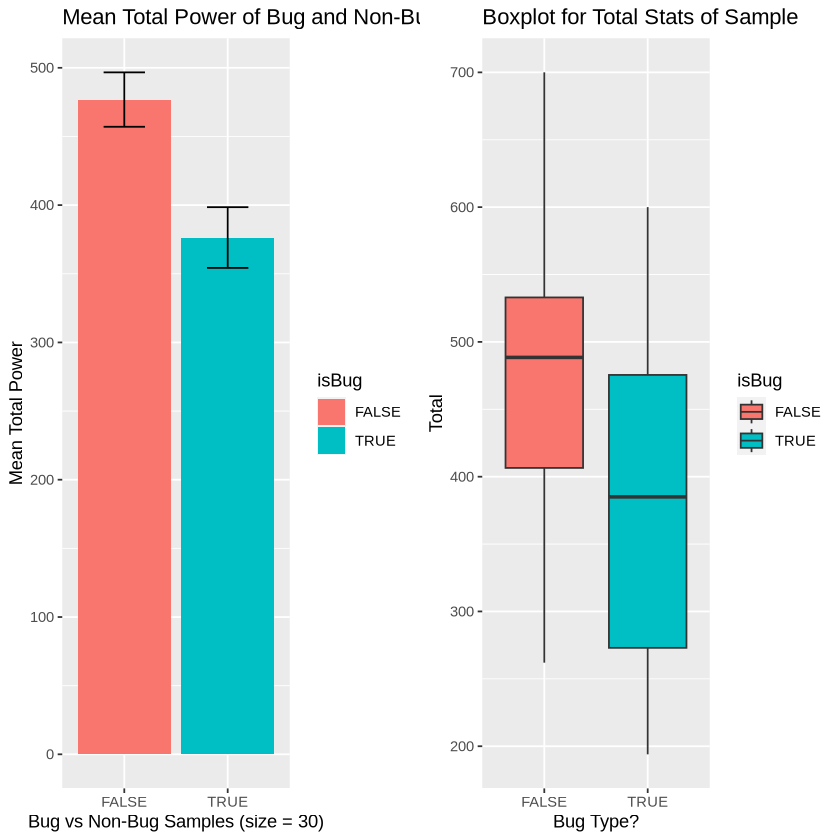

In [5]:
## Visualising difference in total power ##

### Side-by-side bar graph visualising the mean and standard deviation of Bug and non-Bug samples ### 
pokemon_plot <- combined_sample |>
    group_by(isBug) |>
    summarise(meanTotal = mean(Total),
             std_d = sd(Total) / sqrt(n())) |>
    ggplot() +
    geom_col(aes(x=isBug, y=meanTotal, fill = isBug)) +
    geom_errorbar(aes(x = isBug, ymin=meanTotal-std_d, ymax=meanTotal+std_d), width=0.4) +
    ggtitle("Mean Total Power of Bug and Non-Bug Pokemon Samples") +
    xlab("Bug vs Non-Bug Samples (size = 30)") +
    ylab("Mean Total Power")

### Side-by-side boxplot shwing the numerical summary of Total Power of Bug and non-Bug samples ###
box_plot <- combined_sample |>
    ggplot(aes(x = isBug, y = Total, fill = isBug)) +
    geom_boxplot() + 
    ggtitle("Boxplot for Total Stats of Sample") +
    xlab("Bug Type?")

grid.arrange(pokemon_plot, box_plot, ncol=2)

The above graphs show that in our sample, non-Bug Pokemon had a higher mean Total than Bug Pokemon, suggesting that there is evidence to support our hypothesis.\
(27)

In [6]:
## Visualisation of bug pokemon vs non-bug pokemon in various stats ##
#options(repr.plot.width = 10, repr.plot.height = 6)
#bug_data <- bug_sample |>
#    summarise(isBug = TRUE,
#        mean_Total = mean(Total),
#           mean_HP = mean(HP),
#           mean_Attack = mean(Attack),
#           mean_Defense = mean(Defense),
#           mean_Sp_Attack = mean(Sp._Atk),
#           mean_Sp_Defense = mean(Sp._Def),
#           mean_Speed = mean(Speed))#
#
#non_bug_data <- non_bug_sample |>
#    summarise(isBug = FALSE,
#           mean_Total = mean(Total),
#           mean_HP = mean(HP),
#           mean_Attack = mean(Attack),
#           mean_Defense = mean(Defense),
#           mean_Sp_Attack = mean(Sp._Atk),
#           mean_Sp_Defense = mean(Sp._Def),
#           mean_Speed = mean(Speed))#
#
#summary_data = rbind(bug_data,non_bug_data) |>
#    gather(Total, Value, -isBug)
#
#summary_plot <- summary_data |>
#    ggplot(aes(x = Total, y = Value, fill = isBug)) +
#    geom_col(position = "dodge")
#
#summary_plot


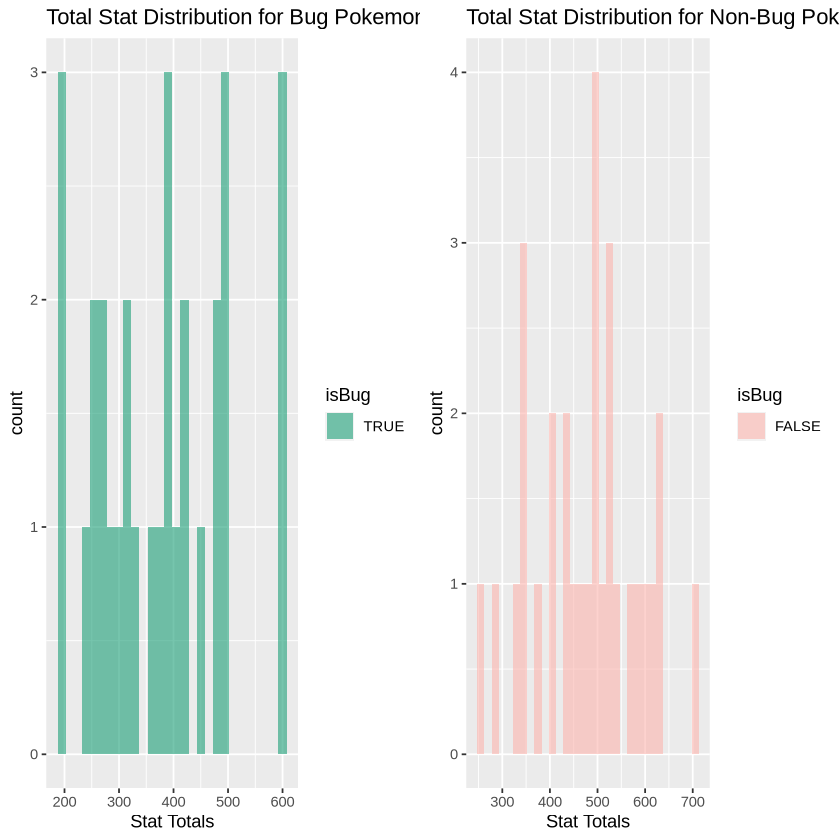

In [7]:
## Side-by-side visualisation of Bug and non-Bug sample distributions ##
bug_sample_dist <- bug_sample |>
    ggplot(aes(x = Total, fill = isBug)) +
    geom_histogram(binwidth = 15, alpha = 0.6, position = position_dodge(width = 5 )) +
    ggtitle("Total Stat Distribution for Bug Pokemon") +
    xlab("Stat Totals") +
    scale_fill_brewer(palette="Dark2")

non_bug_sample_dist <- non_bug_sample |>
    ggplot(aes(x = Total, fill = isBug)) +
    geom_histogram(binwidth = 15, alpha = 0.6, position = position_dodge(width = 5 )) +
    ggtitle("Total Stat Distribution for Non-Bug Pokemon") +
    xlab("Stat Totals") +
    scale_fill_brewer(palette="Pastel1")
#    geom_vline(aes(xintercept=sample_means$non_bug_power, colour="red")) +
#    geom_vline(aes(xintercept=sample_means$bug_power, colour = "green")) ## not working

grid.arrange(bug_sample_dist, non_bug_sample_dist, ncol=2)

## Methodology

While our preliminary results support our initial claim of bug inferiority, as the plots and point estimates alone do not provide statistical significance. There is no way to ascertain whether any observed differences are statistically meaningful or just the result of random variations. Therefore, to eliminate any lingering uncertainty, the performed hypothesis testing will provide a clear and reliable answer to our inferential research question.

We will conduct a hypothesis test to ascertain whether the average Base Power of Bug-type Pokémon significantly differs from the average base power of the population. This test will provide a clear conclusion about the statistical significance of large base power differences:
<p style="text-align: center;">Null Hypothesis : Average Mean Total of Bug Pokemon is equal to average mean total of Non-Bug Pokemon.</p>
<p style="text-align: center;">Alternative Hypothesis: Average mean Total of Bug Pokemon is Less than average mean total of non-bug pokemon.</p>

In addition to the hypothesis test, we will compute a confidence interval for the standard deviation of the base power of Bug-type Pokémon from that of the population. The interval will indicate the plausible range within which the standard deviation resides, further enhancing the accuracy of our estimates. If the hypothesis test shows statistical significance, it could influence an average Pokémon player’s gameplay strategy, potentially leading to a change in the perception of Bug-type Pokémon. This could lead to more informed and engaging gameplay discussions and, ultimately, a much better experience for Pokémon players at home.\
However, one limitation is that Pokémon players require more than just visual insights and averages to make informed decisions during gameplay. They need robust, statistically supported conclusions.
Hence, potential future questions will highlight these subtleties in gameplay, such as:
* How can Bug-type Pokémon be balanced for future games?
* How will players adapt to this knowledge? Will they develop new strategies or techniques to overcome the lower base power of Bug-type Pokémon?\
(309)

## Theory-Based Hypothesis Testing

We are conducting a two-sample t-test to determine whether there is a significant difference in means between bug pokemon stats and non-bug pokemon stats. For this hypothesis test, we are using: $$H_0:\mu_0 - \mu_1 = 0$$
$$H_A : \mu_0 - \mu_1 > 0$$
where $\mu_0$ represents the mean of non-bug pokemon and $\mu_1$ represents the mean of bug pokemon. The first step is to calculate the test statistic, using the formula 
$$
T = \frac{\mu_0 - \mu_1 - d_0}{\sigma }
$$
where the standard error, $\sigma$ is $$\sigma = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} $$
where $s^2$ represents the variance of that sample and $n$ represents the sample size. We will be using $\alpha = 0.05$ as our significance level.

In [10]:
mean_bug <- mean(bug_sample$Total)
mean_nonBug <- mean(non_bug_sample$Total)
var_bug <- var(bug_sample$Total)
var_nonBug <- var(non_bug_sample$Total)
n1 <- 30
n0 <- 30
sigma <- sqrt(var_bug/n1 + var_nonBug/n0)
sigma

[1] 29.69327

The standard error is found to be about 29.6932. 

In [15]:
test_stat <- (mean_nonBug - mean_bug)/(sigma)
test_stat
n <- 30


[1] 3.384606

The test statistic is found to be about 3.3846. To calculate the likelihood of this value occuring, we can determine the p value through the use of the function pt. However, pt requires an argument for degrees of freedom. The degrees of freedom of this t-test is calculated through
$$\nu = \frac{
    \left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2
}
{
\frac{s_1^4}{n_1^2(n_1-1)}+\frac{s_2^4}{n_2^2(n_2-1)}
}
$$
and then rounded down to the next integer.

In [14]:
df <- floor(sigma^4/(var_bug^2/(n^2*(n-1)) + var_nonBug^2/(n^2*(n-1))))
df

[1] 57

The degrees of freedom is found to be 57. Using these values, the p value of this test can be determined. 

In [16]:
p_val <- pt(test_stat, df, lower.tail = FALSE)
p_val

[1] 0.0006477801

The p value is found to be less than 0.05, and as such, there is a significant difference in means. As a result, we reject the null hypothesis in favour of our alternate hypothesis.

## Confidence Interval

1. Specify formula (Explanatory = isBug, Response = Total)

2. Generate 2000 bootstrap samples of size 30

3. Calculate difference in means (!isBug - isBug)

4. Get C.I with confidence level = 0.95

6. See if captures 0

lower_ci,upper_ci
<dbl>,<dbl>
42.4616,156.2666


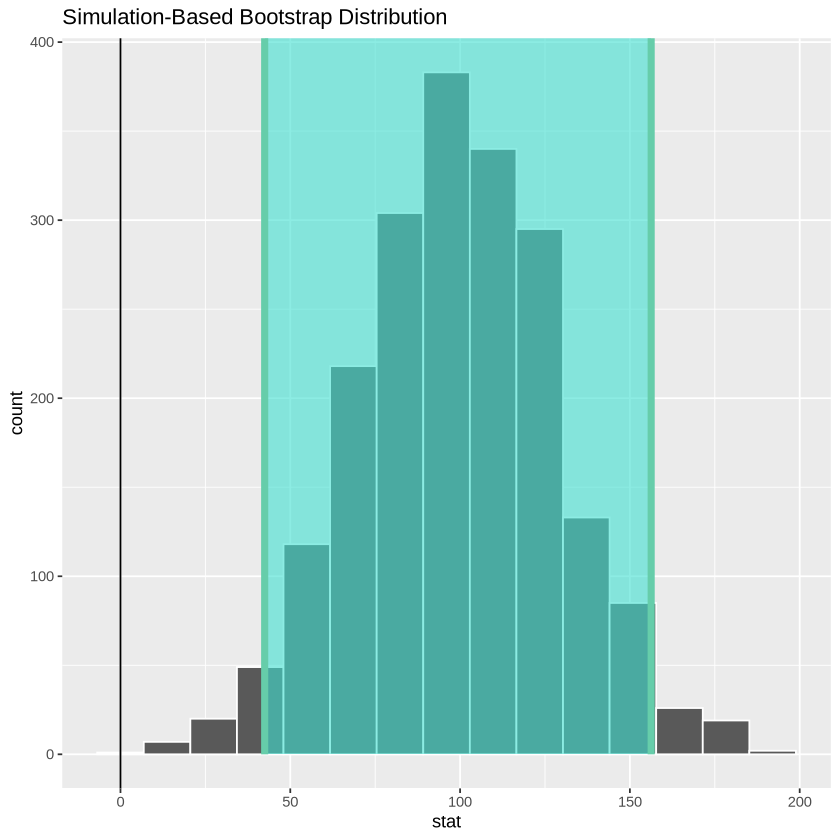

In [9]:
bootstrap_dist <- combined_sample |>
    specify(formula = Total ~ isBug) |>
    generate(reps = 2000, size = 30, type = "bootstrap") |>
    calculate(stat = "diff in means", order =c(FALSE, TRUE))

ci <- bootstrap_dist |>
    get_ci(0.95)


ci_plot <-bootstrap_dist|>
    visualise() +
    shade_ci(ci) +
    geom_vline(xintercept=0)

ci_plot
ci

## References

Barradas, A. (2016). Kaggle.com. Pokemon with stats. Retrieved from https://www.kaggle.com/datasets/abcsds/pokemon/data.

Mäyrä, F. (2017). Pokémon GO: Entering the Ludic Society. Mobile Media & Communication, 5(1), 47-50. https://doi.org/10.1177/2050157916678270

Tobin, J., Buckingham, D., Sefton-Green, J., Allison, A., & Iwabuchi, K. (2004). Pikachu's global adventure: The rise and fall of pokémon (1st ed.). Duke University Press. https://doi.org/10.1515/9780822385813

Word Count: 559